<a href="https://colab.research.google.com/github/achstu/biosignals/blob/main/EMG/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analiza EMG ##

#### Pobieranie sygnałów ####

In [ ]:
import gdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.signal as ss
import pywt

In [ ]:
url = "https://drive.google.com/drive/folders/1SZvr7TjEgom_91QEEsMDjgJNZa3rfYC6?usp=drive_link"
# z mojego gdrive'a
# url = "https://drive.google.com/drive/folders/1XJCMOxq8cbQ286vO_3Zem6OuqMk0JpAy?usp=sharing"
gdown.download_folder(url)

Retrieving folder contents


Processing file 1kw0_qH90n0Ky4ChTAaGUmIN6One0a1B0 ksiazki.obci.raw
Processing file 16lQ3gqHmFORrBHu4jY1GPocZyGI3jvON ksiazki.obci.tag
Processing file 1uPHtAGPnp0D7r1MKZue0fagX2CcOw5kB ksiazki.obci.xml
Processing file 1GmOh80yD3qW7m8srfInjCPi9mFQg5Ik1 napinanie.obci.raw
Processing file 149gTuBmwPJbfeDleG454LYUgS5dcUpWt napinanie.obci.tag
Processing file 1ebS8WChHOjEsfwV-p35XOSKGhv3A1TI4 napinanie.obci.xml
Processing file 15YI7JUKXTYxZG4eIsrJpS3EoPiTa1M9N silownia.obci.raw
Processing file 19wOLq-CwvF8In0y07W2n4tsm9Jn0gjIg silownia.obci.tag
Processing file 1wrUHiTJnwLZLu61sLyqv34HpVzyTvSUB silownia.obci.xml
Processing file 1z2HQcfOCflKEy9zcbTIX8ckwjIWJogl6 silowniaonehand.obci.raw
Processing file 1ZL8tQoCiCkV9Bo19Hbac6uVgMeaMsexJ silowniaonehand.obci.tag
Processing file 1POw18wQPxjUcLTbVrs6HjKLvN1Xy48Tg silowniaonehand.obci.xml


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1kw0_qH90n0Ky4ChTAaGUmIN6One0a1B0
To: /content/OM/ksiazki.obci.raw
100%|██████████| 9.36M/9.36M [00:00<00:00, 211MB/s]
Downloading...
From: https://drive.google.com/uc?id=16lQ3gqHmFORrBHu4jY1GPocZyGI3jvON
To: /content/OM/ksiazki.obci.tag
100%|██████████| 161/161 [00:00<00:00, 406kB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1uPHtAGPnp0D7r1MKZue0fagX2CcOw5kB
From (redirected): https://drive.google.com/uc?id=1uPHtAGPnp0D7r1MKZue0fagX2CcOw5kB&confirm=t&uuid=2ecffb7f-368e-4e0a-b5e3-2399071ef728
To: /content/OM/ksiazki.obci.xml
100%|██████████| 1.27k/1.27k [00:00<00:00, 3.26MB/s]
Downloading...
From: https://drive.google.com/uc?id=1GmOh80yD3qW7m8srfInjCPi9mFQg5Ik1
To: /content/OM/napinanie.obci.raw
100%|██████████| 2.32M/2.32M [00:00<00:00, 158MB/s]
Downloading...
From: https://drive.google.com/uc?id=149gTuBmwPJbf

['/content/OM/ksiazki.obci.raw',
 '/content/OM/ksiazki.obci.tag',
 '/content/OM/ksiazki.obci.xml',
 '/content/OM/napinanie.obci.raw',
 '/content/OM/napinanie.obci.tag',
 '/content/OM/napinanie.obci.xml',
 '/content/OM/silownia.obci.raw',
 '/content/OM/silownia.obci.tag',
 '/content/OM/silownia.obci.xml',
 '/content/OM/silowniaonehand.obci.raw',
 '/content/OM/silowniaonehand.obci.tag',
 '/content/OM/silowniaonehand.obci.xml']

In [ ]:
!ls OM/ | awk -F. '{print $1}' | uniq

ksiazki
napinanie
silownia
silowniaonehand


In [ ]:
Fs = 2048
recordings = [
  'ksiazki',
  'napinanie',
  'silownia',
  'silowniaonehand',
]

In [ ]:
# można zobaczyć częstość próbkowania, kanały i stałe kalibracyjne
!cat OM/ksiazki.obci.xml

<?xml version="1.0" encoding="utf-8"?>
<rs:rawSignal xmlns:rs="http://signalml.org/rawsignal">
	<rs:exportFileName>name</rs:exportFileName>
	<rs:sourceFileName>/home/syg_bio_1/ksiazki.obci.raw</rs:sourceFileName>
	<rs:sourceFileFormat>
		<rs:rawSignalInfo></rs:rawSignalInfo>
	</rs:sourceFileFormat>
	<rs:samplingFrequency>2048.0</rs:samplingFrequency>
	<rs:channelCount>3</rs:channelCount>
	<rs:sampleCount>780416</rs:sampleCount>
	<rs:calibration>1.0</rs:calibration>
	<rs:sampleType>FLOAT</rs:sampleType>
	<rs:byteOrder>LITTLE_ENDIAN</rs:byteOrder>
	<rs:pageSize>20.0</rs:pageSize>
	<rs:blocksPerPage>5</rs:blocksPerPage>
	<rs:channelLabels>
		<rs:label>lewo</rs:label>
		<rs:label>prawo</rs:label>
		<rs:label>Bip25</rs:label>
	</rs:channelLabels>
	<rs:calibrationGain>
		<rs:calibrationParam>0.07150000333786011</rs:calibrationParam>
		<rs:calibrationParam>0.07150000333786011</rs:calibrationParam>
		<rs:calibrationParam>0.07150000333786011</rs:calibrationParam>
	</rs:calibrationGain>
	<rs:cal

In [ ]:
# funkcja pomocnicza do tworzenia osi czasu
def time(sig):
  return np.arange(0, len(sig) / Fs, 1 / Fs)

In [ ]:
# średnia biegnąca
def moving_average(sig, w_len):
  window = np.ones(int(w_len)) / int(w_len)
  return np.convolve(sig, window, mode='same')

 Opis sygnałów:
 - `ksiazki` sygnał spoczynkowy (ok 60 s), następnie stopniowe zwiększanie obciążenia (co 20 s), a następnie zmniejszanie do poziomu wyjściowego - 8 poziomów obciążenia (nie licząc stanu spoczynkowego)
 - `napinanie` naprzemiennie (po około 5 s) napinanie i rozluźnianie bicepsa
 - `silownia` sygnał spoczynkowy (około 20 s), po którym następuje statyczne obciążenie rąk
 - `silowniaonehand` tak samo jak poprzednio, z tą różnicą, że tym razem to samo obciążenie były nałożone na tylko jedną rękę

#### Wczytywanie i filtracja ####

In [ ]:
def filter(sig):
  # górnoprzepustowy
  b, a = ss.butter(N=4, Wn=30, btype='highpass', analog=False, fs=Fs)
  sig = ss.filtfilt(b, a, sig)

  # dolnoprzepustowy
  b, a = ss.butter(N=2, Wn=500, btype='lowpass', analog=False, fs=Fs)
  sig = ss.filtfilt(b, a, sig)

  # notch
  b, a = ss.iirnotch(w0=50, Q=30, fs=Fs)
  ss.filtfilt(b, a, sig)

  return sig

In [ ]:
def signal(name, bipolar=True):
  channels = ['lewo', 'prawo', 'bip']
  types = ['<f', '<f', '<f']
  dtypes = list(zip(channels, types))

  raw = np.fromfile(f"OM/{name}.obci.raw", dtype=dtypes)
  sig = raw['bip'] if bipolar else (raw['lewo'] - raw['prawo'])

  # skalowanie do mV
  scale = 0.07150000333786011 / 1000
  return scale * filter(sig)

#### Przebieg sygnału ####

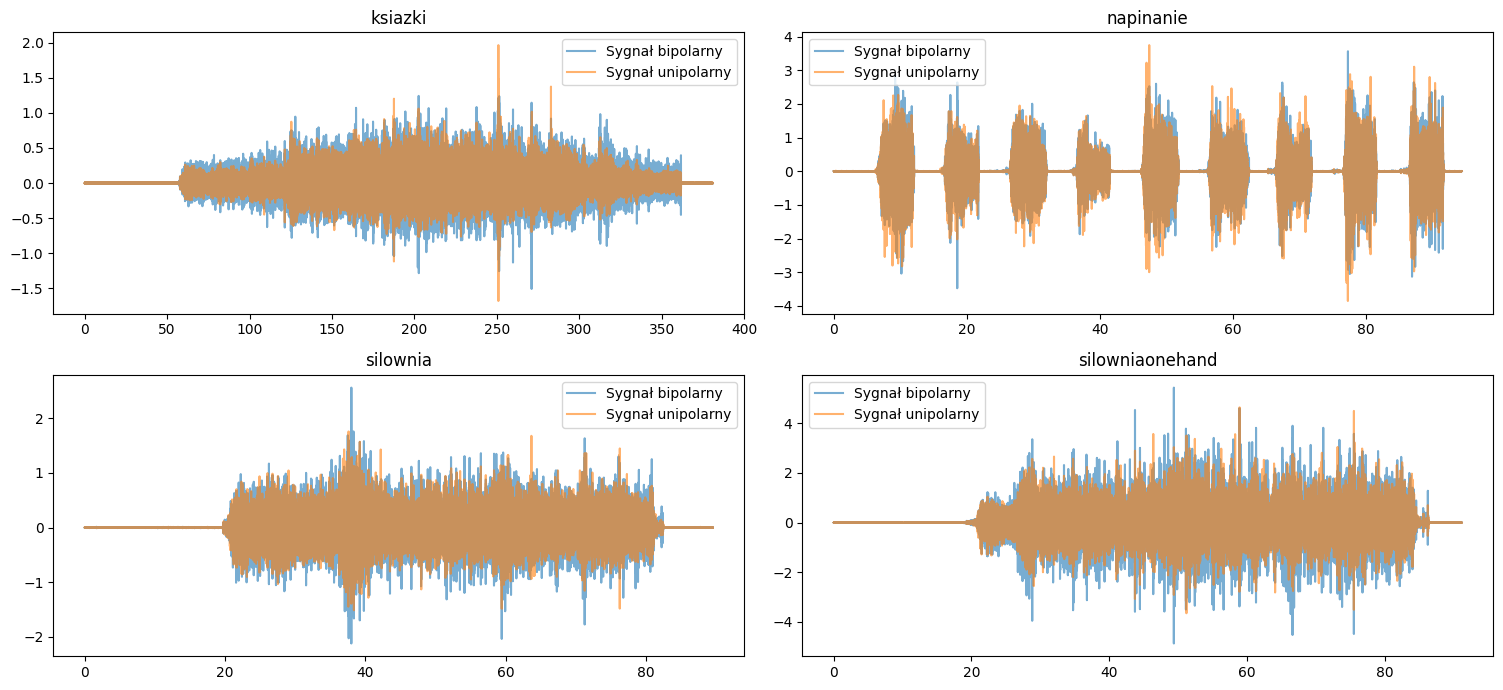

In [ ]:
plt.figure(figsize=(15, 7))

for pos, name in enumerate(recordings):
  plt.subplot(2, 2, pos + 1)

  bip = signal(name)
  plt.plot(time(bip), bip, alpha=0.6)

  uni = signal(name, bipolar=False)
  plt.plot(time(uni), uni, alpha=0.6)

  plt.legend(['Sygnał bipolarny', 'Sygnał unipolarny'])
  plt.title(name)

plt.tight_layout()
plt.show()

#### Analiza szumu ####

Dla każdego z nagranych sygnałów wyznaczyłem początkowy fragment spoczynkowy (jest to odpowiednio 45, 5, 18, 18 sekund) na podstawie powyższyzch wykresów. Dla każdego z tych wycinków będę zakładał, że sygnał składa się z czystego szumu. Dla każdego fragmentu można zobaczyć jego przebieg (po lewej) oraz widmo uzyskane metodą welcha (po prawej).

Największy wkład do szumu na składowa z sieci (50 Hz), która jest silniejsza w sygnale zebranym z dwóch elektrod (unipolarnym). Zatem w dalszych analizach będę uwzględniał sygnał z elektrod bipolarnych.

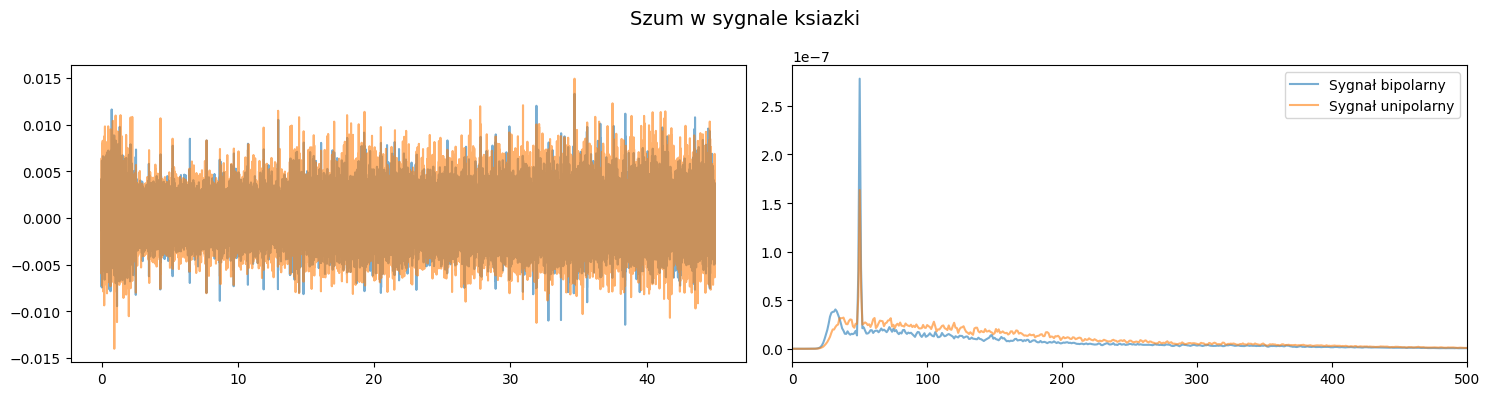

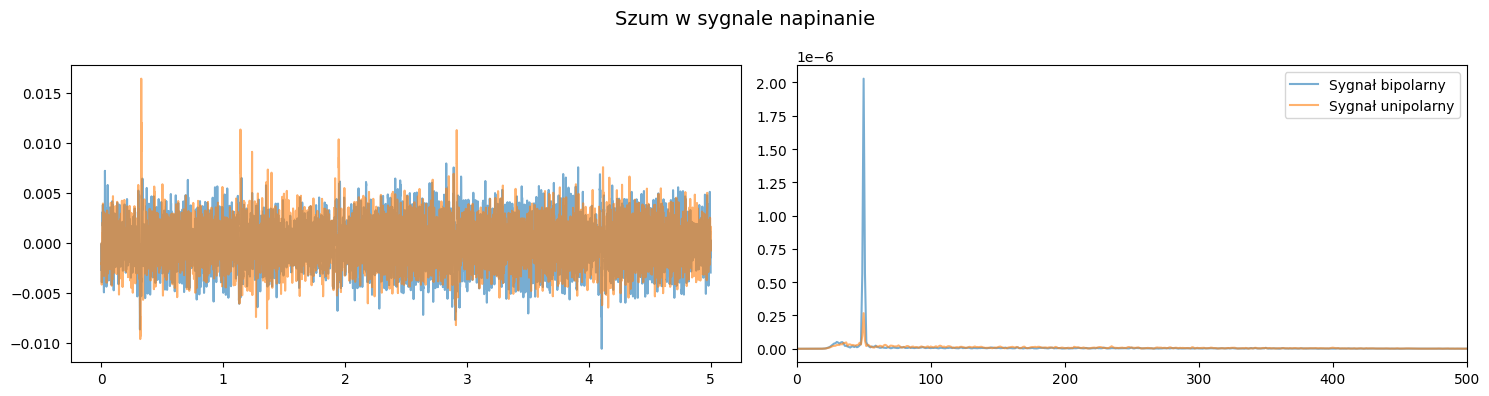

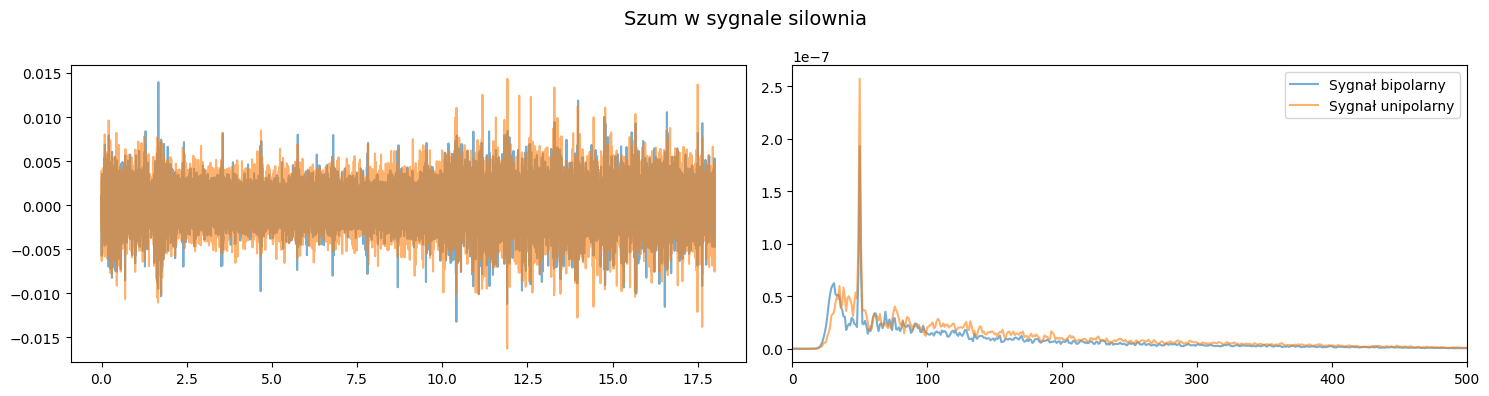

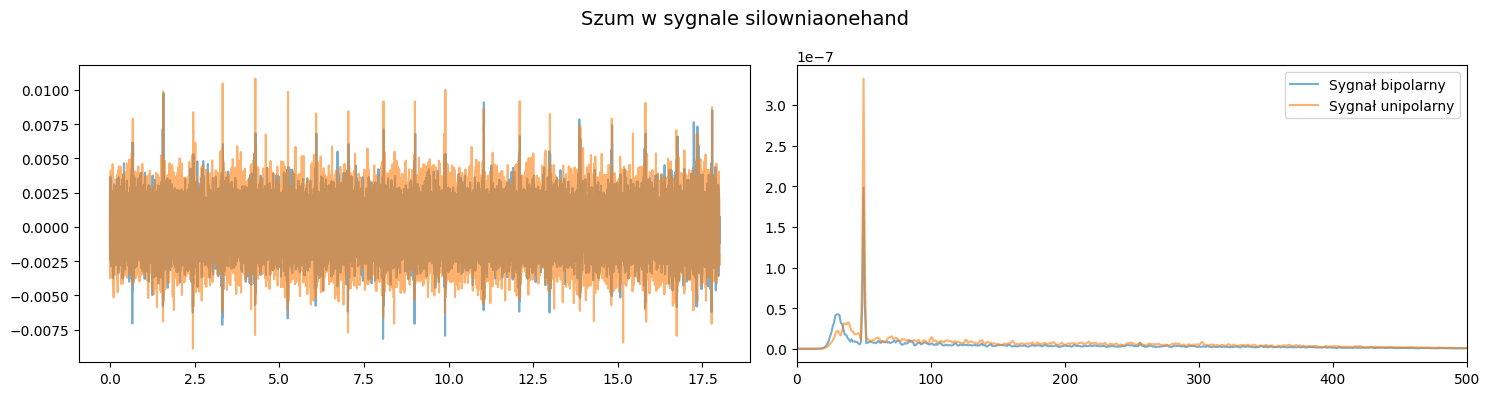

In [ ]:
for name, pref in zip(recordings, [45, 5, 18, 18]):
  fig, axes = plt.subplots(1, 2, figsize=(15, 4))
  fig.suptitle(f"Szum w sygnale {name}", fontsize=14)

  bip = signal(name)[:(pref * Fs)]
  dif = signal(name, bipolar=False)[:(pref * Fs)]

  axes[0].plot(time(bip), bip, alpha=0.6)
  axes[0].plot(time(dif), dif, alpha=0.6)

  axes[1].plot(*ss.welch(bip, fs=Fs, nperseg=Fs), alpha=0.6)
  axes[1].plot(*ss.welch(dif, fs=Fs, nperseg=Fs), alpha=0.6)
  axes[1].set_xlim(0, 500)

  plt.legend(['Sygnał bipolarny', 'Sygnał unipolarny'])
  plt.tight_layout()
  plt.show()

#### Średnia moc sygnałów ####

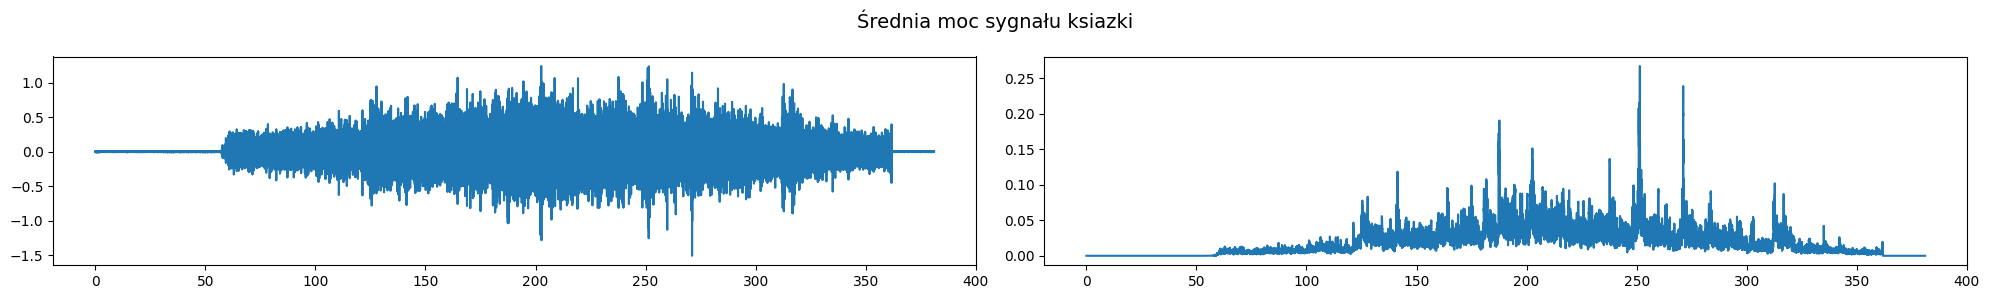

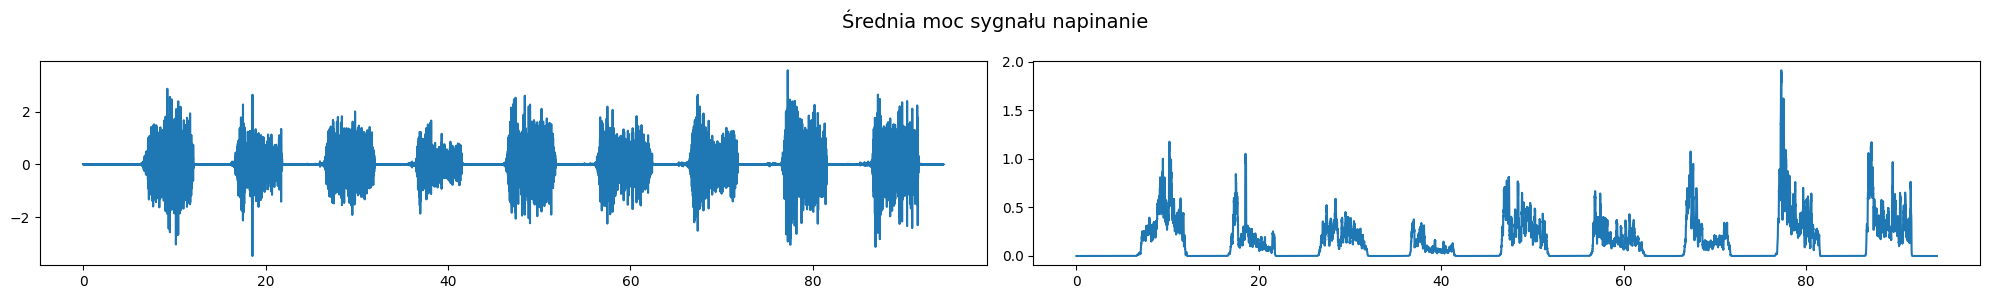

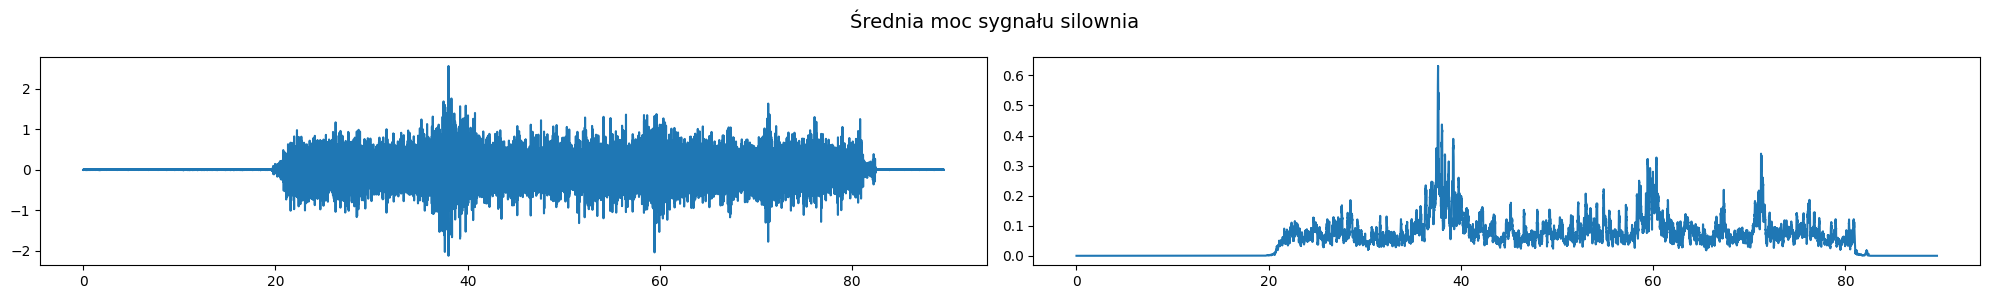

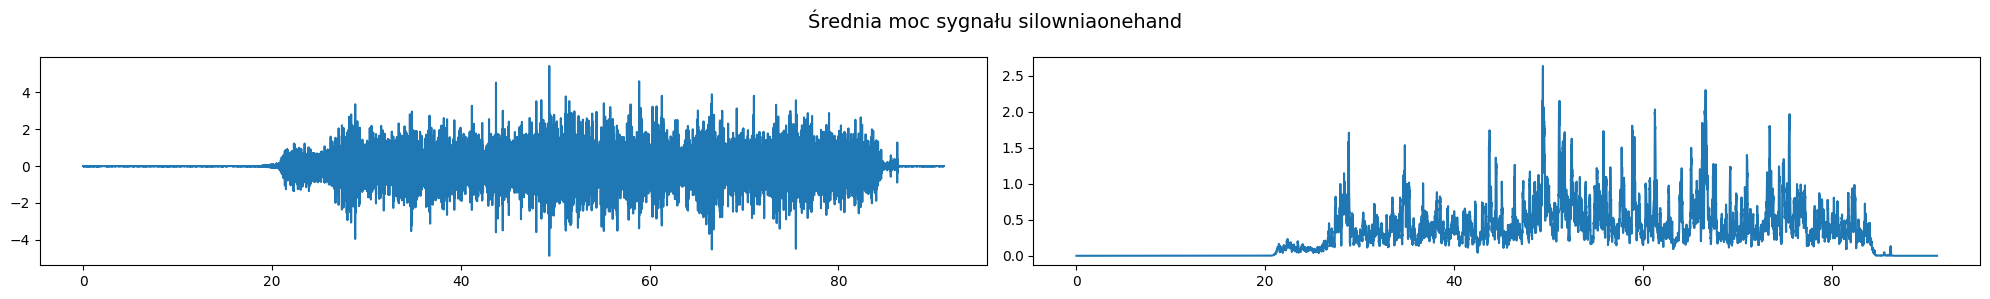

In [ ]:
for name in recordings:
  fig, axes = plt.subplots(1, 2, figsize=(20, 3))
  fig.suptitle(f"Średnia moc sygnału {name}", fontsize=14)

  sig = signal(name)
  axes[0].plot(time(sig), sig)

  Pxx = moving_average(sig ** 2, w_len=.1 * Fs)
  axes[1].plot(time(Pxx), Pxx)

  plt.tight_layout()
  plt.show()

#### Detektor ruchu ręki ####

Detektor bada średnią moc sygnału (uśrednianą okienkiem o długości 0.5 sekundy). Wykrywa aktywność, jeśli średnia moc przekroczy próg tolerancji szumu.



In [ ]:
def detect_muscle_activity(sig):
  x = time(sig)
  pxx = moving_average(sig ** 2, Fs // 2)

  # True gdy występuje aktywność mięśnia, tj. nie zerowa średnia moc
  activity = ~np.isclose(pxx, 0, atol=1e-3)
  diff = np.diff(activity.astype(int))

  # odpowiednio, początki i końce aktywności mięści (do wykresu)
  begin = x[np.where(diff == 1)[0]]
  end = x[np.where(diff == -1)[0]]

  for l, r in zip(begin, end):
    plt.axvspan(l, r, alpha=0.2)

  plt.plot(x, sig)
  plt.show()

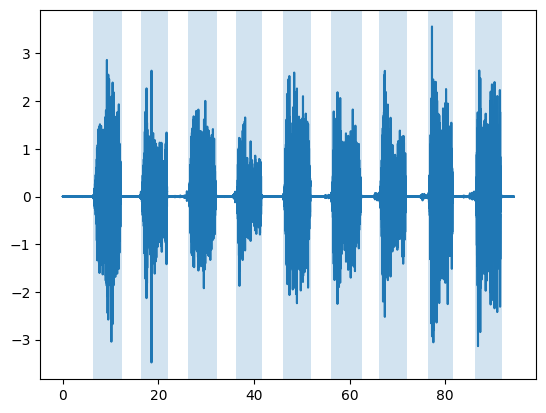

In [ ]:
sig = signal('napinanie')
detect_muscle_activity(sig)

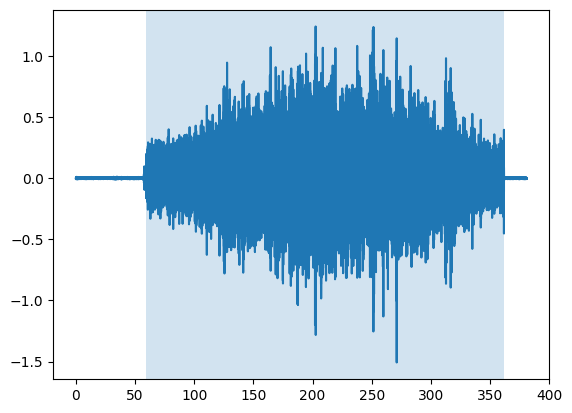

In [ ]:
sig = signal('ksiazki')
detect_muscle_activity(sig)

#### Dynamiczne obciążenie ####

[]

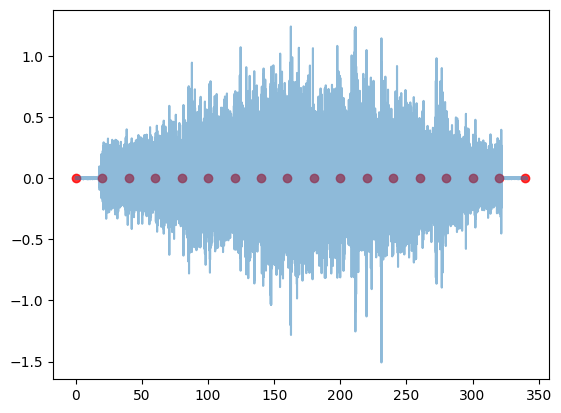

In [ ]:
# usuwamy pierwsze 40 sekund sygnału
sig = signal('ksiazki')[(40 * Fs):]
plt.plot(time(sig), sig, alpha=0.5)

tags = np.arange(0, len(sig), 20 * Fs)
plt.scatter(tags / Fs, np.zeros(len(tags)), c='red', alpha=0.8)

plt.plot()

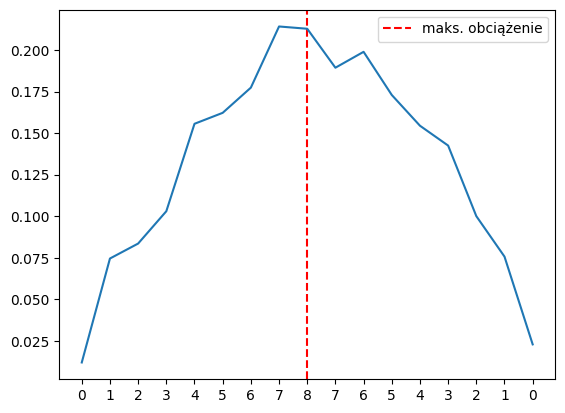

In [ ]:
slices = list(zip(tags, tags[1:]))
n = len(slices)
# lista levels odpowiada poziomon napięcia mięśnia oraz dodatkowo
# przechowuje informacje czy obciążenie spada czy rośnie
levels = [n-l-1 if l >= n//2 else l for l in range(n)]

avg_amp = [sig[l:r].std() for l, r in slices]
plt.xticks(range(n), levels)
plt.axvline(x=n//2, color='r', linestyle='--', label='maks. obciążenie')
plt.plot(range(n), avg_amp)
plt.legend()
plt.show()

Czerwone punkty na pierwszym wykresie to momenty, w których zwiększono obciążenie mięśnia. Na drugim wykresie obowiązuje skala od 0 do 8, gdzie 0 to brak obciążenia, sygnał spoczynowy, a 8 to maksymalne obciążenie. Na wykresie dobrze wydać zależność obciążenia od średniej amplitudy EMG.

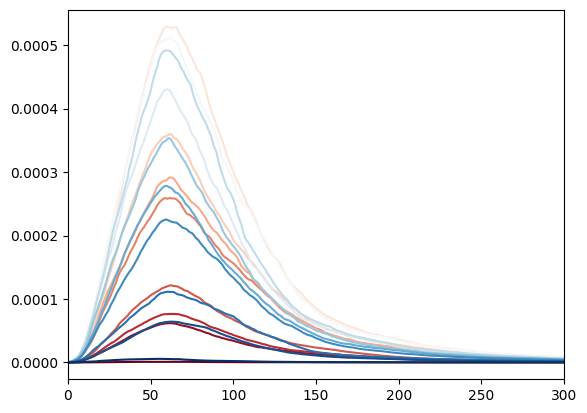

In [ ]:
plt.xlim(0, 300)
cmap = plt.get_cmap('RdBu')(np.linspace(0, 1, n))

for (l,r), c in zip(slices, cmap):
  s = sig[l:r]
  freq, psd = ss.welch(s, fs=Fs, nperseg=Fs)
  psd = moving_average(psd, w_len=0.05*len(psd))
  plt.plot(freq, psd, color=c)

plt.show()

Na wykresie widać widma dla kolejnych obciążeń, na czerwono widma fragmentów w trakcie dokładania książek (zwiększania obciążenia), na niebiesko widma fragmentów podczas zdjemowania ciężaru. Jasność lini określa jak blisko dany fragment (poziom obciążenia) jest blisko obciążenia maksymalnego: im wykres jaśniejszy, tym bliżej do maksymalnego obciążenia.

Dla lepszej czytelności widmo zostało wygładzone filtrem średniej biegnącej z niewielką długością okna.

In [ ]:
def spectrogram(sig):
  f, t, Sxx = ss.spectrogram(sig, Fs, nperseg=Fs)
  # Musimy na wykresie wywalić bin odpowiadający częstości 0Hz
  # ponieważ będziemy skalowali osie logarytmicznie (będzie problem z log 0)
  plt.pcolormesh(t, f[f > 0], Sxx[f > 0])
  # plt.yscale('log')
  plt.ylim(30, 500) # inne częstości wycieliśmy w fazie filtracji
  plt.ylabel('częstość [Hz]')
  plt.xlabel('czas [s]')
  plt.show()


# wiele trików z tego kodu pochodzi z dokumentacji PyWavelets
def scaleogram(sig):
  # wavelet = 'morl'
  # wavelet = 'cmor1.5-1.0'
  # wavelet = 'mexh'
  # wavelet = 'gaus1'
  wavelet = 'cmor3-1'

  # w dokumentacji pywt jest rekomendacja, żeby używać skali logarytmicznej
  # do wyznaczania wag (artyków Torrence & Compo). Tutaj dzielimy dziedzinę
  # częstość na 25 części co daje małą rozdzielczość w częstość, ale dla num=100
  # sesja colaba crash'uje się z powodu braku pamięci RAM (dla num=50 działa
  # bardzo wolno).
  scales = pywt.frequency2scale(wavelet, np.geomspace(30, 500, num=25) / Fs)

  cwtmatr, freqs = pywt.cwt(sig, scales, wavelet, sampling_period=1/Fs)

  # bez grafiki wektorowej dla lepszej wydajności renderowania
  plt.pcolormesh(time(sig), freqs, np.abs(cwtmatr), rasterized=True)

  plt.ylabel('częstość [Hz]')
  plt.xlabel('czas [s]')
  plt.show()

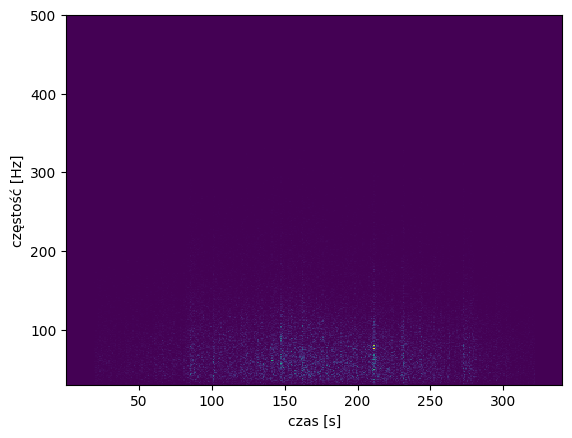

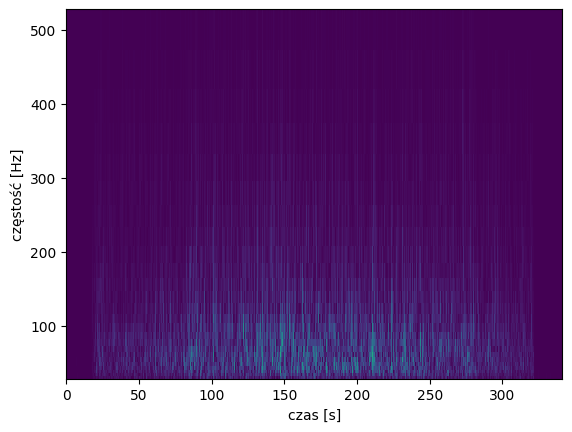

In [ ]:
spectrogram(sig)
scaleogram(sig) # uwaga: kod wykonuje się około minuty (w moim runtime)

Wydaje się, że metoda skalogramu jest lepsza ponieważ sygnał EMG jest wysoce nie stacjonarny, ma dużo pików i falki lepiej odwzrowują tą informacje. Chociaż skalogram liczy i rysuje się bardzo długo. Moc widoczna w widmie jest proporcjonalna do obciążenia mięśnia

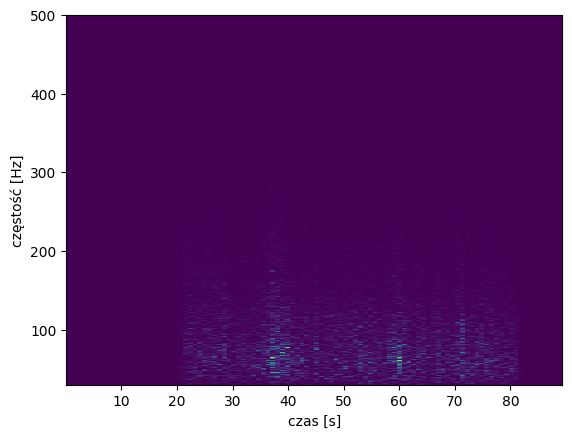

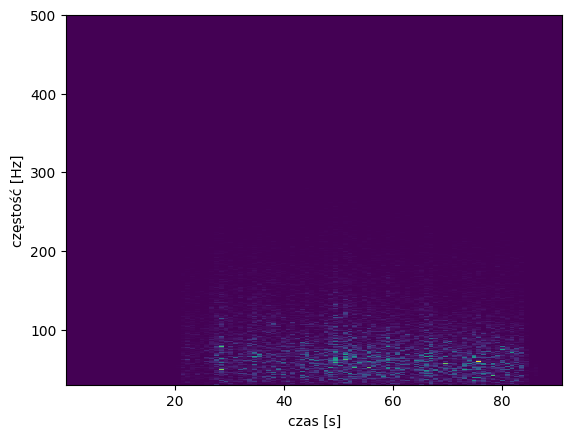

In [ ]:
spectrogram(signal('silownia'))
spectrogram(signal('silowniaonehand'))

Nie ma wyraźnej zależności po między zmęczeniem mięśnia o widmem EMG (obciążenie statyczne). Można jedynie zauważyć momenty mocniejszego spięcia mięśnia (o których pamiętam, że wystąpiły, bo sam trzymałem książki).

#### Środek ciężkości widma ####

In [ ]:
def spectral_centroid(sig):
  # będziemy robili okienka długości 1 sekundy
  tags = np.arange(0, len(sig), Fs)
  slices = list(zip(tags, tags[1:]))

  centroids = []
  for l,r in slices:
    s = sig[l:r]

    S = np.fft.rfft(s)
    freq = np.fft.rfftfreq(len(s), 1/Fs)

    # nie jestem pewiem, czy o to chodzi ze środkiem ciężkości, ale wydaje się
    # całkiem rozsądne
    centroid = np.sum(freq * S) / np.sum(S)
    centroids.append(np.abs(centroid))

  plt.plot(centroids)
  plt.show()

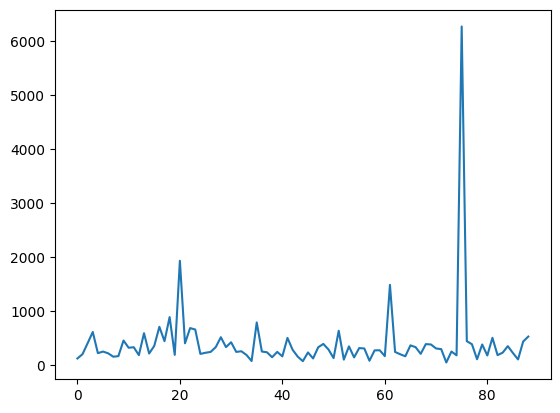

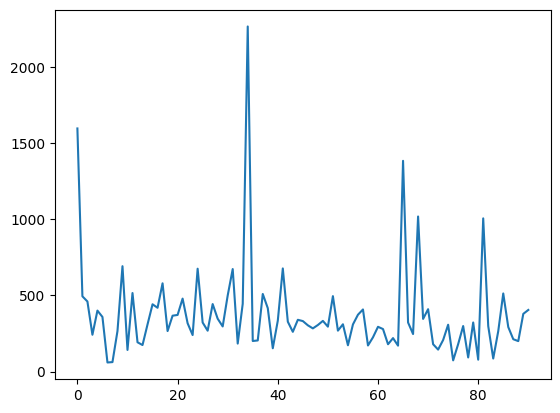

In [ ]:
spectral_centroid(signal('silownia'))
spectral_centroid(signal('silowniaonehand'))